# 笔试题1 基本nn网络的实现与理解

100%|██████████| 9912422/9912422 [00:01<00:00, 5621613.57it/s]


Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 5335430.25it/s]


Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 8986098.48it/s]

Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



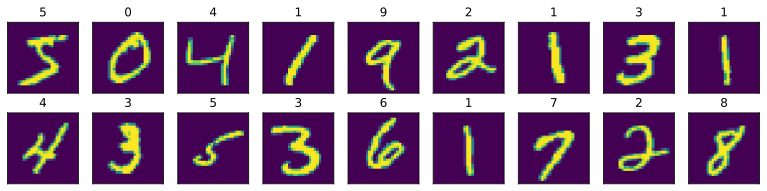

In [18]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.MNIST(
    root = "./mnist", train = True, transform = trans, download = True)
mnist_test = torchvision.datasets.MNIST(
    root = "./mnist", train = False, transform = trans, download = True)

len(mnist_train), len(mnist_test)

mnist_train[0][0].shape

def get_mnist_labels(labels):
    text_labels = ['0','1','2','3','4','5','6','7','8','9']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img.numpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_mnist_labels(y))

batch_size = 256

def get_dataloader_workers():
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

